## XGBoost

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Load the dataset
data = pd.read_csv('preprocessed_mental_health.csv')

# Separate features and target
X = data['text']
y = data['mental_health_issue']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical data using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='mlogloss', use_label_encoder=False)

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:27:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 87.39%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.81      0.74      0.77       403
     bipolar       0.77      0.62      0.69       397
  depression       0.72      0.81      0.76       387
      normal       0.93      0.98      0.95      2137
        ptsd       0.86      0.75      0.80       396

    accuracy                           0.87      3720
   macro avg       0.82      0.78      0.80      3720
weighted avg       0.87      0.87      0.87      3720

Confusion Matrix:
 [[ 297   20   39   24   23]
 [  13  248   36   92    8]
 [  30   13  313   17   14]
 [   3   28    8 2096    2]
 [  22   12   36   29  297]]


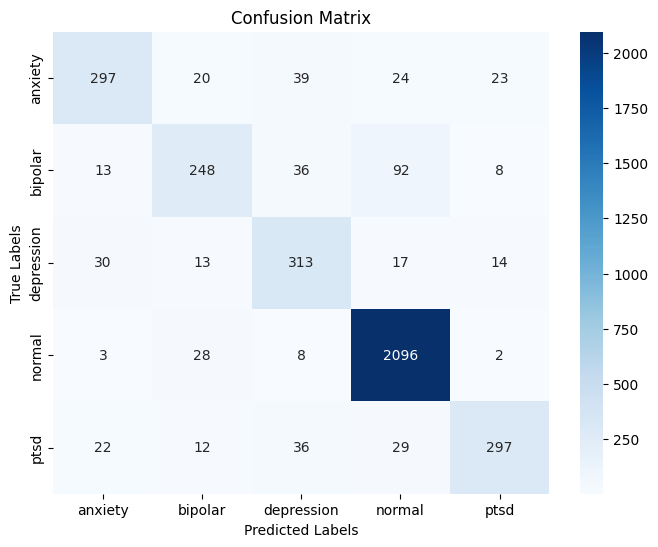

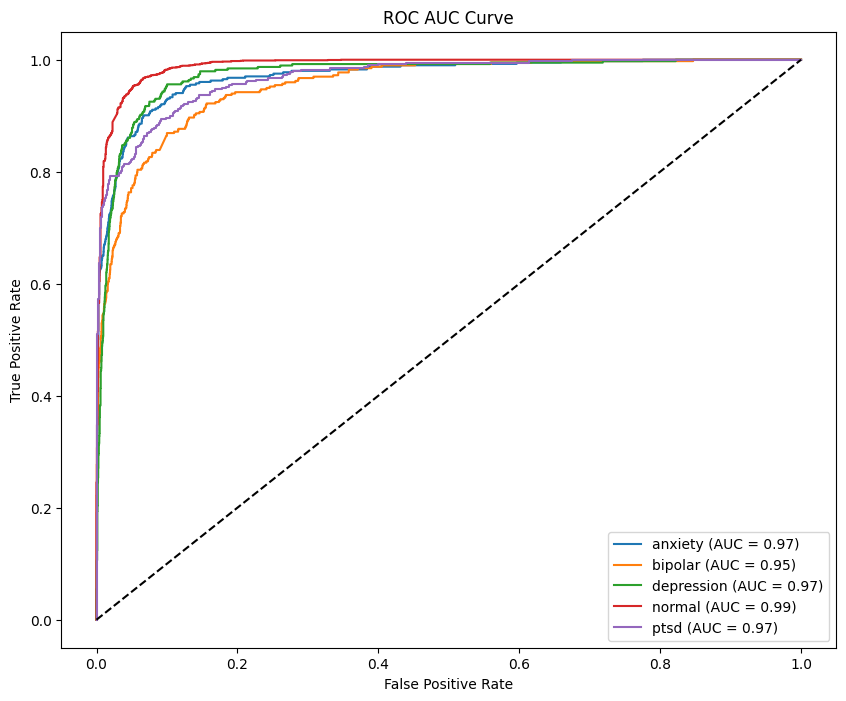

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, labels):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# ROC AUC Curve
def plot_roc_auc(y_test, y_pred_proba, n_classes, labels):
    # Binarize the labels for multi-class ROC AUC calculation
    y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))

    # Compute ROC curve and ROC area for each class
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i]):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, label_encoder.classes_)

# Predict probabilities for ROC AUC curve
y_pred_proba = xgb_clf.predict_proba(X_test)

# Plot the ROC AUC curves
plot_roc_auc(y_test, y_pred_proba, n_classes=5, labels=label_encoder.classes_)


In [4]:
import pickle

# Save the LabelEncoder as a .pkl file
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

# Save the TF-IDF Vectorizer as a .pkl file
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

# Save the trained XGBoost model as a .pkl file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_clf, file)


In [5]:
!jupyter nbconvert --to html 07_XGboost.ipynb

[NbConvertApp] Converting notebook 07_XGboost.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 418980 bytes to 07_XGboost.html
